In [1]:

import pyforest
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pyforest'

In [2]:
data = pd.read_csv('Heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


There are no Null values in the dataset

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the above data description we can observe the following things:
    * The average age is 54.36
    * The minimum and maximum age are 29 and 77 respectively
    * The average heartbeat rate from the data is 149
    * Blood pressure in the dataset varies from 94 to 200. Mean is 131.

In [7]:
sns.countplot(data.sex)
plt.show()

<Figure size 640x480 with 1 Axes>

male sample size is almost twice then female sample size

1    165
0    138
Name: target, dtype: int64


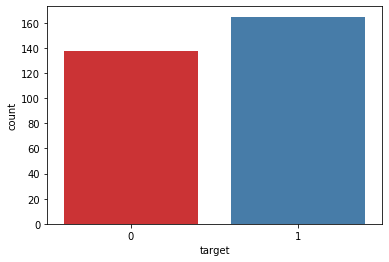

In [8]:
print(data.target.value_counts())
sns.countplot(data.target, palette = "Set1")
plt.show()

165 persons are suffering from heart disease

In [9]:
data_1 = data[data['target']==1]

1    93
0    72
Name: sex, dtype: int64


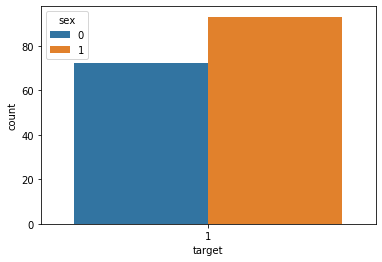

In [10]:
print(data_1.sex.value_counts())
sns.countplot(data_1.target,hue =data_1.sex)
plt.show()

93 male has diesease

72 female has disease

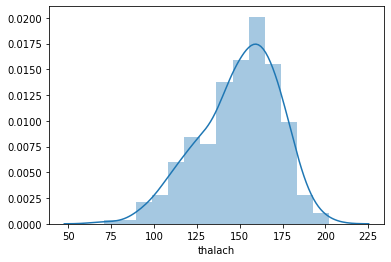

In [11]:
sns.distplot(data.thalach)
plt.show()

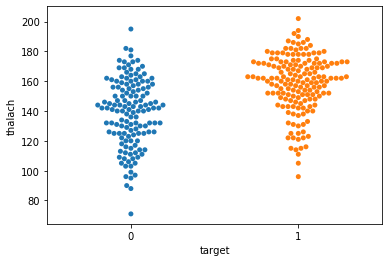

In [12]:
sns.swarmplot(data['target'],data['thalach'])
plt.show()

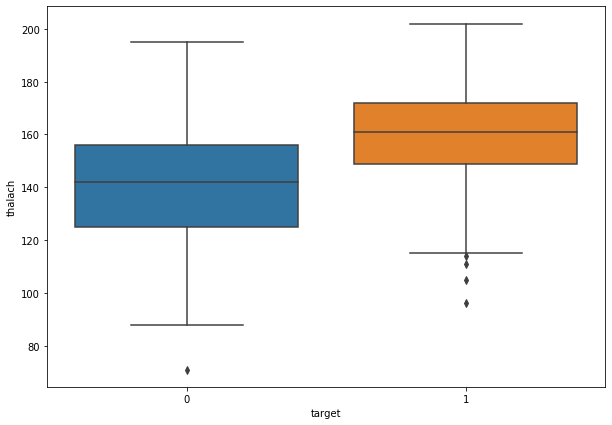

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(data['target'],data['thalach'])
plt.show()

In [14]:
corr_matrix=data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Above cell displays the correlation of independent variables with target vairable

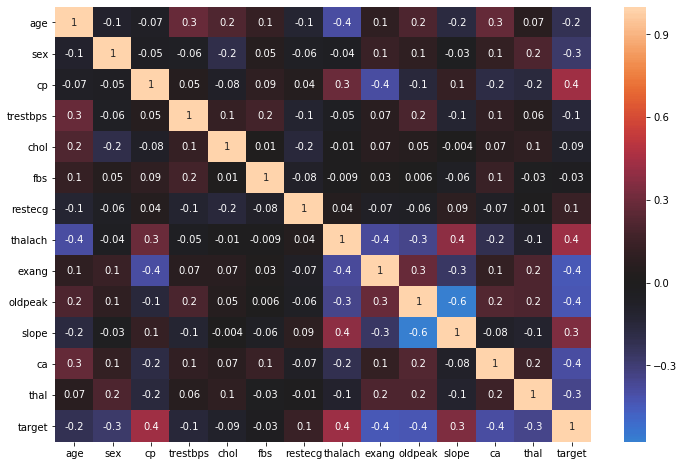

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, fmt='.1g',center=0)
plt.show()

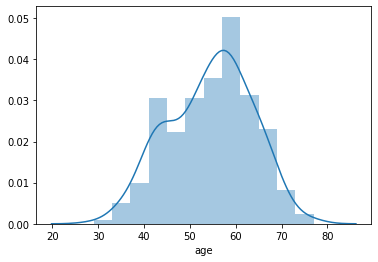

In [16]:
sns.distplot(data.age)

Mean:  54.366336633663366 
Median:  55.0 
Mode:  58


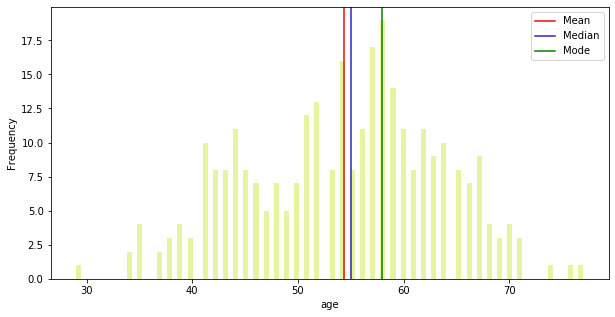

In [17]:
mean=data['age'].mean()
median=data['age'].median()
mode=data['age'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(data['age'],bins=100,color='#e6f49f')
plt.axvline(mean,color='#ed0909',label='Mean')
plt.axvline(median,color='#2a22c9',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
data_age = data[data['target']==1]

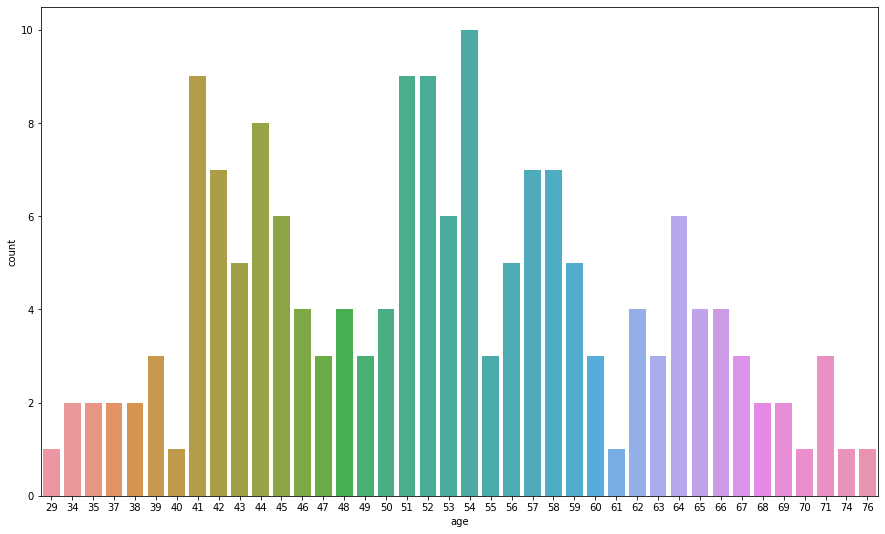

In [19]:
plt.figure(figsize=(15,9))
sns.countplot(data_age['age'])
plt.show()

If we take young people age as <40 then, we could conclude that the young people has less heart disease

In [20]:
data_0 = data[data['target']==0]

In [21]:
data_0['thalach'].max()

195

195 is the max heart rate achieved in non heart disease patients

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])
scaled_data = scaler.transform(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])

In [79]:
x_scaled = scaled_data
y = data['target']

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .30)

### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print(LR.score(x_test,y_test))

0.8351648351648352


In [82]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[30  8]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.85      0.87      0.86        53

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



### Logistic Regression (After Hypertuning)

In [97]:
penalty = ['l1', 'l2','l3']

# Create regularization hyperparameter space
C = np.logspace(0, 2, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [98]:
clf = GridSearchCV(LR, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train, y_train)

In [99]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [101]:
y_pred_tuneLR = best_model.predict(x_test)
print(best_model.score(x_test,y_test))
print(metrics.confusion_matrix(y_test, y_pred_tuneLR))
print(metrics.classification_report(y_test, y_pred_tuneLR))

0.8351648351648352
[[30  8]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.85      0.87      0.86        53

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



### Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
DT =DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=120, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DT.fit(x_train,y_train)
y_predDT = DT.predict(x_test)
print(DT.score(x_test,y_test))
print(metrics.confusion_matrix(y_test, y_predDT))
print(metrics.classification_report(y_test, y_predDT))

0.8241758241758241
[[32  6]
 [10 43]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.88      0.81      0.84        53

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91



### Decision Tree (After Hypertuning)

In [112]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DT, tree_para, cv=5,verbose=0)
bestDT = clf.fit(x_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [113]:
y_pred_tuneDT = bestDT.predict(x_test)
print(bestDT.score(x_test,y_test))
print(metrics.confusion_matrix(y_test, y_pred_tuneDT))
print(metrics.classification_report(y_test, y_pred_tuneDT))

0.8241758241758241
[[31  7]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.79        38
           1       0.86      0.83      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

